#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diminos_data.csv')

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [7]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [8]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [9]:
df.dtypes

order_id               int64
order_placed_at       object
order_delivered_at    object
dtype: object

In [11]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])
df.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
dtype: object

In [12]:
df['delivery_time'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds()/60

In [13]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [15]:
late_deliveries = df.loc[df['delivery_time'] > 31, 'delivery_time'].count()
late_deliveries

np.int64(557)

In [17]:
p95 = df['delivery_time'].quantile(0.95)
p95

np.float64(27.261043996666658)

In [20]:
late_deliveries_percentage = round(late_deliveries / 15000 *100 ,2)
late_deliveries_percentage

np.float64(3.71)

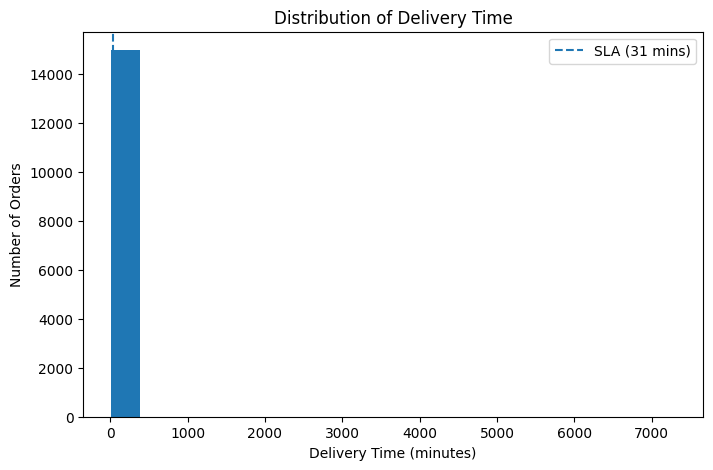

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df["delivery_time"], bins=20)
plt.axvline(31, linestyle='--', label='SLA (31 mins)')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time")
plt.legend()
plt.show()


<Axes: xlabel='delivery_time'>

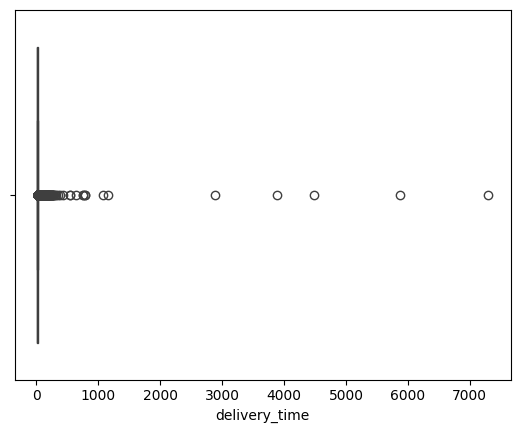

In [25]:
# Checking for outliers

sns.boxplot(x=df['delivery_time'])

In [ ]:
# __Insights__

# total 557 orders out of 15000 delivered after 31 minutes
# only 3.71% orders are late delivered
# there are some extreme outliers in delivery time
# overall , 95th Percentile on Order Delivery time is less than 31 minutes